<a href="https://colab.research.google.com/github/gbsv25/Estudo-de-Probabilidade-Correlacao-e-Regressao-no-ENEM-2019/blob/main/Infer%C3%AAncia_Probabil%C3%ADstica_e_An%C3%A1lise_Estat%C3%ADstica_no_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import binom, geom, poisson
import statsmodels
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
enem_sp = pd.read_csv('/content/drive/MyDrive/projetos portifólio/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

### 1. PROBABILIDADE

Cálculo de probabilidades de alguns eventos específicos dentro do conjunto de dados.

In [ ]:
# Exemplo: Aqui é demosntrado qual a Probabilidade de selecionar uma mulher aleatoriamente do conjunto de dados

total_mulheres = len(enem_sp[enem_sp['SEXO'] == 'F']) #Atibuido a variavel "total_mulheres" o número de pessoas que responderam que pertencem ao sexo feminino
p = total_mulheres / len(enem_sp) # Calcula a proporção de mulheres

In [ ]:
# Função para calcular a probabilidade de um evento A acontecer dentro de um espaço amostral E
def probab (A, E):
  resultado = (A / E)*100
  print('{:.2f}'.format(resultado))

In [ ]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,IN_TREINEIRO,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,0,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,0,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,0,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [ ]:
enem_guarulhos = enem_sp[enem_sp['NO_MUNICIPIO_RESIDENCIA'] == 'Guarulhos']
enem_bauru = enem_sp[enem_sp['NO_MUNICIPIO_RESIDENCIA'] == 'Bauru']

In [ ]:
# Probabilidade de tirar um vestibulando de Guarulhos
resultado = probab(enem_guarulhos.shape[0], enem_sp.shape[0])

3.13


In [ ]:
# Probabilidade de tirar um vestibulando de Bauru
resultado = probab(enem_bauru.shape[0], enem_sp.shape[0])

0.83


### Probabilidade de NÃO ocorrer um evento

In [ ]:
# Função para calcular a probabilidade de um evento NÃO ocorrer
def probab_nao (A, E):
  resultado = (1- (A / E))*100
  print('{:.2f}'.format(resultado))

In [ ]:
#Probabilidade de Não retirar um vestibulando de Guarulhos
probab_nao (len(enem_guarulhos), len(enem_sp))

96.87


In [ ]:
#Probabilidade de Não retirar um vestibulando de Guarulhos e nem de Bauru
probab_nao (len(enem_guarulhos)+len(enem_bauru), len(enem_sp))

96.04


### Probabilidade da união mutuamente exclusivos (AUB)

In [ ]:
#Criando Função de probabilidade de acontecer um dos dois eventos (União Mutualmente exclusivos AUB)
def probab_uniao (A, B, E):
  resultado = (A/E + B/E)*100
  print('{:.2f}'.format(resultado))

In [ ]:
#Probabilidade de retirar vestibulando de Guarulhos ou de Bauru
resultado = probab_uniao (len(enem_guarulhos), len(enem_bauru), len(enem_sp))

3.96


### Probabilidade da Intersecção de dois eventos

In [ ]:
#Criando a função de probabilidade de intersecção de dois eventos
def probab_intersec (A, B, E):
  resultado = (A/E * B/E)*100
  print('{:.3f}'.format(resultado))

In [ ]:
#Probabilidade de retirar vestibulando de Guarulhos e de Bauru (com reposição)
probab_intersec (len(enem_guarulhos),len(enem_bauru),len(enem_sp))

0.026


### 2. DISTRIBUIÇÕES DISCRETAS
Utilização de distribuições probabilísticas para modelar eventos discretos

### 2.1 Distribuição Binomial
Ultilizando da probabilidade de retirar mulheres num total de N amostras, como ultilizado na primeira análise estatística acima.

binom.pmf(k, n, p): Probabilidade exata de obter k sucessos em n tentativas.

binom.cdf(k, n, p): Probabilidade acumulada até k sucessos em n tentativas.



In [ ]:
#Probabilidade de retirar 4 mulheres num total de 10 amostras

binom.pmf(4,10,p)

# Primeiro parâmetro:valor ou limite que se está pretendo calcular
# Segundo: número de tentativas
# Terceiro: probabilidade de um sucesso.

0.13014261971434243

In [ ]:
#Probabilidade de retirar mais de 3 mulheres num total de 10 amostras
prob_binom_mais_3 = 1 - binom.cdf(3, 10, p)


In [ ]:
prob_binom_mais_3

0.929117468512205

In [ ]:
# PROBABILIDADE DE RETIRAR MAIS DO QUE 8 MULHERES NUM TOTAL DE 10 AMOSTRAS
p4 = binom.pmf(9,10,p)+binom.pmf(10,10,p)
p4

0.0356563059595738

### 2.2 Distribuição Geométrica
A distribuição geométrica modela o número de tentativas necessárias até o primeiro sucesso em uma sequência de experimentos de Bernoulli independentes, onde cada tentativa tem uma probabilidade fixa de sucesso (p).

Exemplo de aplicação: Em um processo de seleção, a distribuição geométrica pode ser usada para calcular a probabilidade de que o primeiro candidato aprovado apareça na 4ª entrevista.

geom.pmf(k, p): Calcula a probabilidade de sucesso ocorrer exatamente na k-ésima tentativa.

prob_geom = geom.pmf(4, p) Probabilidade de a primeira mulher aparecer na quarta tentativa


In [ ]:
# PROBABILIDADE DE RETIRAR 3 AMOSTRAS E NENHUMA SER MULHER
# geom.pmf(x,p) x representa a tentativa que se obteve sucesso e p a probabilidade
geom.pmf(4, p)

0.042898029955685306

In [ ]:
# Probabilidade de a primeira mulher aparecer até a 4ª tentativa
prob_geom_acumulada = geom.cdf(4, p)
prob_geom_acumulada

0.9689758830793873

In [ ]:
# Probabilidade de precisar de mais de 5 tentativas para encontrar a primeira mulher
prob_geom_mais_5 = 1 - geom.cdf(5, p)
prob_geom_mais_5

0.013020398775951292

### 2.3 Distribuição de Poisson

A Distribuição de Poisson é usada para modelar a probabilidade do número de eventos ocorrer em um intervalo fixo de tempo ou espaço, considerando que os eventos ocorrem de maneira independente e com uma taxa média constante (λ).

## Aplicações:
Número de vestibulandos que terminam a prova dentro de um determinado período.

Número de alunos chegando a uma sala de aula a cada hora.

Número de acessos simultâneos a uma plataforma de ensino.

In [ ]:
# Num local de prova, 100 vestibulandos, normalmente, terminaram a prova em 2 horas (tempo mínimo). aqui é calculado a
# Probabilidade de exatamente 90 vestibulandos terminarem a prova em 2h.

# poisson.pmf(x, m) x é a quantidade de ocorrências EM ESTUDO e m é a taxa de ocorrências.
prob_poisson = poisson.pmf(90, 100)
prob_poisson

0.025038944623030353

In [ ]:
#Outra análise com a Distribuição de Poisson seria a Probabilidade de no máximo 95 vestibulandos terminarem a prova em 2 horas:
prob_poisson_cdf = poisson.cdf(95, 100)
prob_poisson_cdf

0.3311917340353065

In [ ]:
#Probabilidade de mais de 105 vestibulandos terminarem a prova em 2 horas.
prob_poisson_maior = 1 - poisson.cdf(105, 100)
prob_poisson_maior

0.2871921175814586

#4. Testes de Normalidade

Este código realiza uma análise estatística de normalidade para verificar se as notas do ENEM seguem uma distribuição normal. Para isso, utilizamos métodos gráficos e testes estatísticos.

### O código está estruturado da seguinte forma:
4.1. Geração de histogramas e Q-Q plots para visualização da distribuição dos dados.      
4.2. Aplicação do Teste de Shapiro-Wilk para avaliar a normalidade dos dados.  
4.3. Aplicação do Teste de Kolmogorov-Smirnov em conjunto com a distribuição normal teórica.

4.1. Histograma para visualizar a distribuição das notas.

In [ ]:
import plotly.express as px
grafico =  px.histogram (enem_sp,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',)
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação')
grafico.show()

In [ ]:
import plotly.express as px
grafico =  px.histogram (enem_guarulhos,  x = "NOTA_REDACAO", nbins=32, histnorm='percent',)
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas de Redação')
grafico.show()

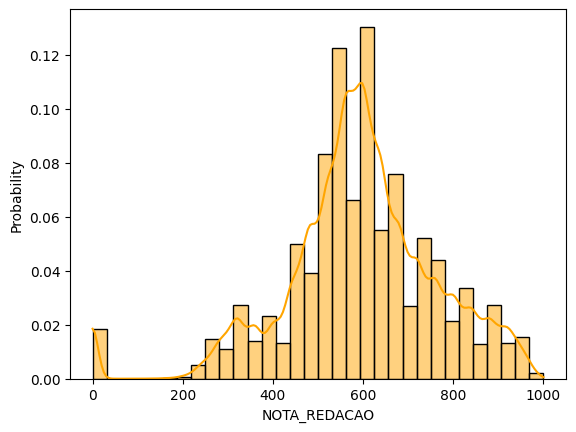

In [ ]:
import seaborn as sns
sns.histplot(enem_sp, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

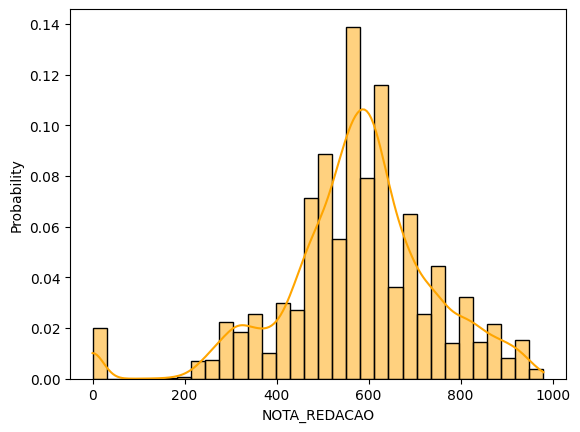

In [ ]:
sns.histplot(enem_guarulhos, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

4.1. Q-Q Plot para verificar a aderência dos dados à distribuição normal

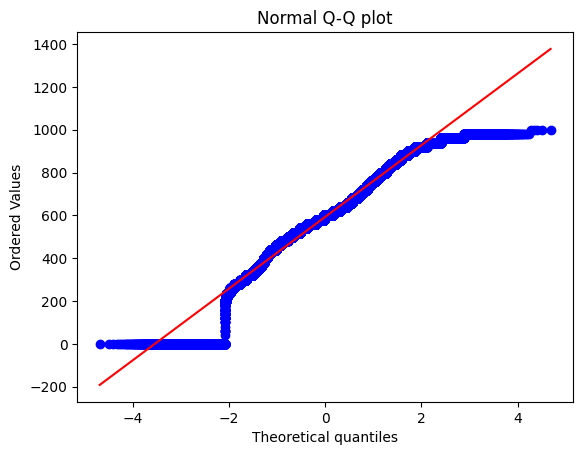

In [ ]:
stats.probplot(enem_sp['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

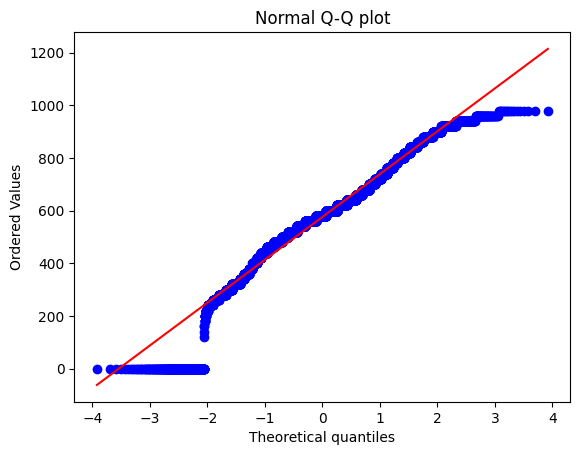

In [ ]:
stats.probplot(enem_guarulhos['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

4.3. Teste Lilliefors (Kolmogorov-Smirnov)

O teste de Kolmogorov-Smirnov é utilizado para verificar se uma amostra segue uma distribuição teórica específica, neste caso, a distribuição normal. Ele mede a maior diferença entre a função de distribuição empírica da amostra e a função de distribuição acumulada da normal teórica.

É útil para amostras grandes e quando não temos certeza sobre a distribuição subjacente. para comparação com a distribuição normal.

In [ ]:
statsmodels.stats.diagnostic.lilliefors(enem_sp.NOTA_REDACAO, dist = 'norm')

(0.0831243667968013, 0.0009999999999998899)

In [ ]:
statsmodels.stats.diagnostic.lilliefors(enem_guarulhos.NOTA_REDACAO, dist = 'norm')

(0.09063373269530312, 0.0009999999999998899)